In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


**name, email , gender , country are irrelevant. drop them**

In [5]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

**Drop NA**

In [6]:
df.isna().sum()

age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

**Plot The Graph**

Text(0.5, 1.0, 'credit card debt vs annual Salary')

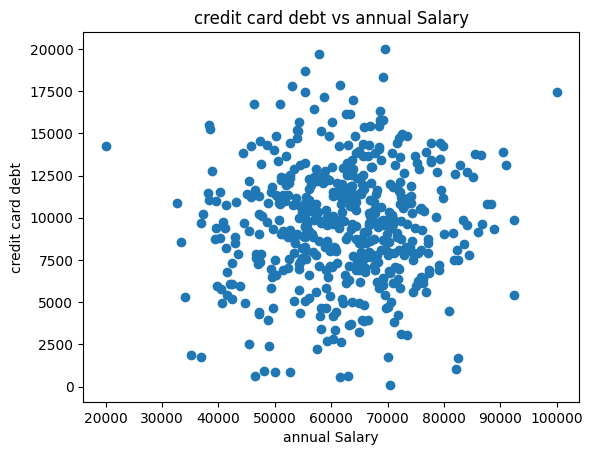

In [7]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('credit card debt vs annual Salary')

**Split X and y**

In [8]:
X = df.iloc[:, :-1] #drop target column
X

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016
496,37.642000,56039.49793,12301.456790,360419.0988
497,53.943497,68888.77805,10611.606860,764531.3203
498,59.160509,49811.99062,14013.034510,337826.6382


In [9]:
y = df.iloc[:, -1] #drop all columns , except target column
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

**Scaling The Data**

In [10]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
#Reshape(-1, 1) : you are asking numpy to reshape your array with 1 column and as many rows as necessary to accommodate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

**create model (Linear Regression)**


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Training accuracy', model.score(X_train, y_train))
print('Testing accuracy', model.score(X_test, y_test))

Training accuracy 0.9999999807028982
Testing accuracy 0.9999999830702558


In [12]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999830702558


**create model (ANN)**

In [13]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])
ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])
model = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 29ms/step - loss: 0.0690 - mean_absolute_error: 0.2271 - val_loss: 0.0382 - val_mean_absolute_error: 0.1598
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0252 - mean_absolute_error: 0.1272 - val_loss: 0.0175 - val_mean_absolute_error: 0.1086
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0210 - mean_absolute_error: 0.1162 - val_loss: 0.0160 - val_mean_absolute_error: 0.1018
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.1061 - val_loss: 0.0128 - val_mean_absolute_error: 0.0936
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0938 - val_loss: 0.0122 - val_mean_absolute_error: 0.0909
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0881 - val_loss: 0.0106 - val_mean_absolute_error: 0.0848
Epoch 7/50
10/10 [=========

In [14]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.1046e-04 - mean_absolute_error: 0.0097


[0.0002104550221702084, 0.009746484458446503]

In [15]:
ann.predict([[50, 50000.500, 8650,444000]])

1/1 [==============================] - 0s 98ms/step


array([[251432.39]], dtype=float32)

**Save the model**

In [16]:
ann.save("Car_Price_ANN.keras")

In [17]:
import keras
ann = keras.models.load_model('Car_Price_ANN.keras')
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.1046e-04 - mean_absolute_error: 0.0097


[0.0002104550221702084, 0.009746484458446503]